# Team Project in Python

Members: Anamika Mishra and Rohit Jayakumar Nair.

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [322]:
#******************************Data Wrangling**********************************

#Load the Data
# Read the CSV File Using Pandas read_csv function
greview='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/googleplaystore_user_reviews.csv'
gapp='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/googleplaystore.csv'
GoogleApp = pd.read_csv(gapp)
GoogleReview = pd.read_csv(greview)
GoogleApp.head()
GoogleReview.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [323]:
#Summary of the movies dataset
#Check the datatype of the columns to determine anomalies and datatype discrepencies
print(GoogleApp.info())
print(GoogleReview.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype

In [324]:
#Analyze the data distribution of numerical features using describe function
GoogleApp.describe(include='all')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
#Analyze the data distribution of numerical features using describe function
GoogleReview.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


GoogleApp null values App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
GoogleReview null values 26863


(64295, 5)

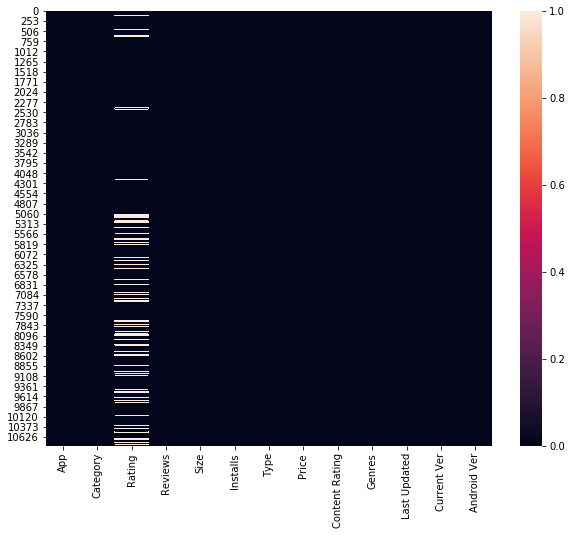

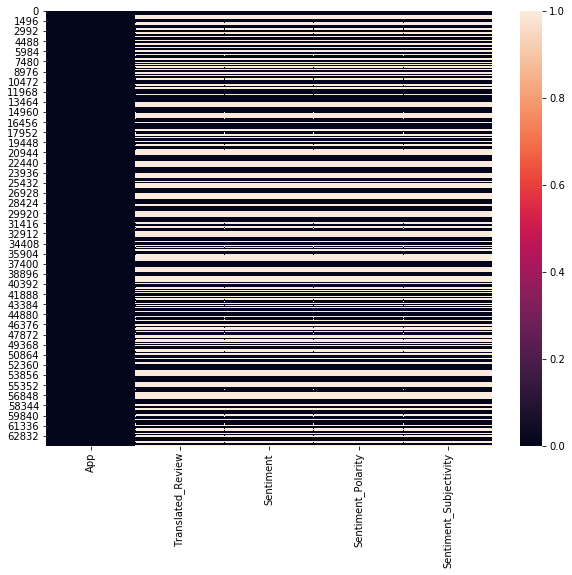

In [326]:
#Handling missing values
#GoogleApp
#Identify null values
print('GoogleApp null values',GoogleApp.isnull().sum())

#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleApp.isnull())

#From the plot below, we can say that there are null values in Rating variable and a few missing values in Type, Content Rating , Current Ver and andoird version variables
GoogleApp.isnull().sum()

#GoogleReview
#Identify null values
print('GoogleReview null values',GoogleReview['Sentiment'].isnull().sum())
#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleReview.isnull())

#From the plot below, we can say that there are null values in Rating variable and a few missing values in Type, Content Rating , Current Ver and andoird version variables
GoogleReview.isnull().sum()
GoogleReview.shape

In [327]:
# Update missing values

#Ratio of complete and incomplete observations w.r.t revenue and budget columns
Trows,Tcols = GoogleApp.shape
print('Approximately',(GoogleApp['Current Ver'].str.contains('Varies with device').sum()/Trows)*100,'% of the Current Version has garbage value')
print('Approximately',(GoogleApp['Rating'].isnull().sum()/Trows)*100,'% of the Rating is missing')


Approximately 13.458168065676599 % of the Current Version has garbage value
Approximately 13.596531685268886 % of the Rating is missing


In [328]:
#Update missing rating values with the median value ( since this is one of the crucial variable for exploratory data analysis,
#we are replacing the null values/ missing values with the meadian value of the variable)
GoogleApp['Rating'] = GoogleApp['Rating'].fillna(GoogleApp['Rating'].median())

#Similarly, missing values in the current version variable is being handled using mode function
GoogleApp['Current Ver'] = GoogleApp['Current Ver'].replace('Varies with device',np.nan)
GoogleApp['Current Ver'] = GoogleApp['Current Ver'].fillna(GoogleApp['Current Ver'].mode()[0])

GoogleApp['Android Ver'] = GoogleApp['Android Ver'].replace('Varies with device',np.nan)
GoogleApp['Android Ver'] = GoogleApp['Android Ver'].fillna(GoogleApp['Android Ver'].mode()[0])
# Removing NaN values
GoogleApp = GoogleApp.dropna(how='any',axis=0)

# Removing NaN values
GoogleReview = GoogleReview.dropna(how='any',axis=0)

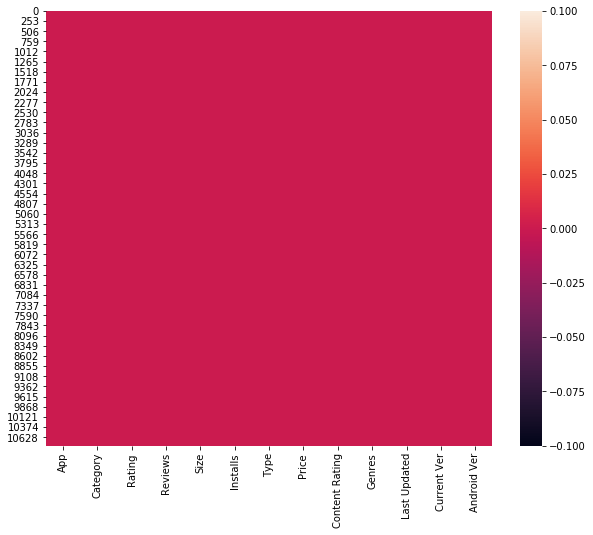

In [329]:
#Validating the dataset for observed Vs missing values
#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleApp.isnull())

#From the plot below, we can say that there are no missing values in the dataset

In [330]:
GoogleApp.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10839,10839,10839.000000,10839,10839,10839,10839,10839,10839,10839,10839,10839,10839
unique,9658,33,NaN,6001,461,20,2,92,6,119,1377,2830,32
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",1.0,4.1 and up
freq,9,1971,NaN,595,1694,1579,10039,10039,8714,842,326,2275,3814
mean,NaN,NaN,4.206467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.480363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
print(GoogleApp.isnull().sum())
print(GoogleReview.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [332]:
#Summary of the movies dataset
#Check the datatype of the columns to determine anomalies and datatype discrepencies
GoogleApp.info()
GoogleApp.describe(include='all')
GoogleReview.info()
GoogleReview.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,37427,37427,37427,37427.000000,37427.000000
unique,865,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,312,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182171,0.492770
std,NaN,NaN,NaN,0.351318,0.259904
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [333]:
#Check for duplicate data using duplicated method
# Select duplicate rows except first occurrence based on all columns
duplicateRowsGApp = GoogleApp[GoogleApp.duplicated()]
duplicateRowsGR = GoogleReview[GoogleReview.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsGApp)
print(duplicateRowsGR)


Duplicate Rows except first occurrence based on all columns are :
                                                   App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP

In [334]:
#Merge Google App and App Review datasets
GoogleStore = pd.merge(GoogleApp, GoogleReview,on='App')
GoogleStore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72600,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",1.0,4.1 and up,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
72601,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",1.0,4.1 and up,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
72602,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",1.0,4.1 and up,Too much ads,Positive,0.200000,0.200000
72603,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",1.0,4.1 and up,Just allow time ...,Neutral,0.000000,0.000000


In [335]:
#Exploratory Data Analysis can be used to answer preliminary business queries, 
#understand data distribution in details and to further tune the data for predictive analysis
#Analyze the Applications with the high number of installs
GoogleStore['Installs'] = GoogleStore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [336]:
#To achieve this objective , we will group the dataset based on application  and count the number of installs
GoogleStore['Installs'] = GoogleStore['Installs'].astype(int)
NewDS = GoogleStore.groupby('App')['Installs'].sum().reset_index()
final_result = NewDS.sort_values(by = 'Installs', ascending = False).head(10)
final_result

,App,Installs
308,Candy Crush Saga,8.400000e+11
706,Google Photos,7.640000e+11
703,Google News,4.680000e+11
755,Hangouts,4.560000e+11
526,Facebook,2.640000e+11
677,Gmail,1.920000e+11
468,Duolingo: Learn Languages Free,1.680000e+11
769,Helix Jump,1.638000e+11
19,8 Ball Pool,1.533000e+11
109,Angry Birds Classic,1.365000e+11


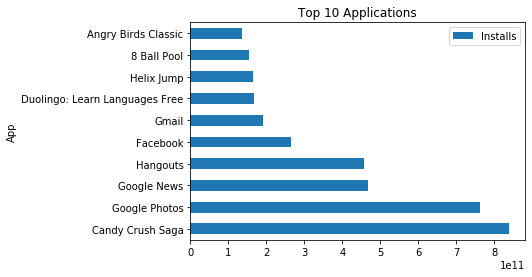

In [337]:
final_result.plot(kind='barh',x='App',y='Installs',title='Top 10 Applications')

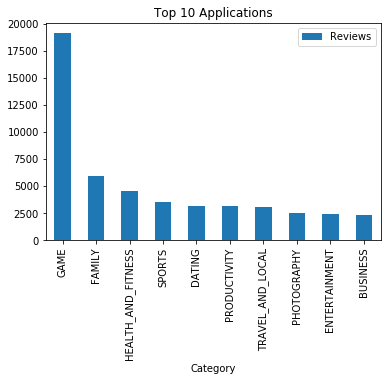

In [340]:
#Most popular category
ReviewCount = GoogleStore.groupby('Category').count()['Reviews'].reset_index()
final_result = ReviewCount.sort_values(by = 'Reviews', ascending = False).head(10)
final_result
final_result.plot(kind='bar',x='Category',y='Reviews',title='Top reviewed categories')